In [756]:
#Data: USA Housing

In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

%matplotlib inline

In [758]:
USA_HOUSING = pd.read_csv("USA_Housing.csv")

In [759]:
#Explore Dataset

In [760]:
USA_HOUSING.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [761]:
USA_HOUSING.tail()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population        Price  \
4995                          3.46      22837.36103  1060193.786   
4996                          4.02      25616.11549  1482617.729   
4997                          2.13      33266.14549  1030729.583   
4998                          5.44      42625.62016  1198656.872   
4999                          4.07      46501.28380  1298950.480   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...

In [762]:
#Shows the variables 

In [763]:
USA_HOUSING.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [764]:
#Check for Duplication

In [765]:
USA_HOUSING.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [766]:
#Missing Values Calculation ' identify null values in the data &  get the number of missing records in each column'

In [767]:
USA_HOUSING.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [768]:
#Calculate the percentage of missing values in each column

In [769]:
(USA_HOUSING.isnull().sum()/(len(USA_HOUSING)))*100

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

In [770]:
#number of rows/ number of columns.

In [771]:
USA_HOUSING.shape

(5000, 7)

In [772]:
#check for duplicate values in dataset 

In [773]:
duplicateValues = USA_HOUSING.duplicated()
print(duplicateValues.sum())
USA_HOUSING[duplicateValues]

0


Empty DataFrame
Columns: [Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population, Price, Address]
Index: []

In [774]:
#no missing values in our DataFrame. The describe a statistical summary of the numerical features

In [775]:
USA_HOUSING.describe().T

count          mean            std  \
Avg. Area Income              5000.0  6.858311e+04   10657.991214   
Avg. Area House Age           5000.0  5.977222e+00       0.991456   
Avg. Area Number of Rooms     5000.0  6.987792e+00       1.005833   
Avg. Area Number of Bedrooms  5000.0  3.981330e+00       1.234137   
Area Population               5000.0  3.616352e+04    9925.650114   
Price                         5000.0  1.232073e+06  353117.626584   

                                       min            25%           50%  \
Avg. Area Income              17796.631190   61480.562390  6.880429e+04   
Avg. Area House Age               2.644304       5.322283  5.970429e+00   
Avg. Area Number of Rooms         3.236194       6.299250  7.002902e+00   
Avg. Area Number of Bedrooms      2.000000       3.140000  4.050000e+00   
Area Population                 172.610686   29403.928700  3.619941e+04   
Price                         15938.657920  997577.135075  1.232669e+06   

                                       75%           max  
Avg. Area Income              7.578334e+04  1.077017e+05  
Avg. Area House Age           6.650808e+00  9.519088e+00  
Avg. Area Number of Rooms     7.665871e+00  1.075959e+01  
Avg. Area Number of Bedrooms  4.490000e+00  6.500000e+00  
Area Population               4.286129e+04  6.962171e+04  
Price                         1.471210e+06  2.469066e+06

In [776]:
#Review address column 

In [777]:
!pip install folium
import folium

In [778]:
#use google to review lat and lon  for 1st 5 address

In [779]:
import folium

def generateBaseMap(default_location=[39.32, -91.45], default_zoom_start=10):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        Location=default_location,
        control_scale=True,
        zoom_start=default_zoom_start
    )

    return base_map
    

In [780]:
base_map = generateBaseMap(default_location=[39.32, -91.45])
display(base_map)

In [781]:
#data set require lat & lon. Data also confirm PO BOX and address is not compatible to graph 

In [782]:
#There are no null values.
#However Address column, provides no assistance to other values. so i am dropping it.

In [783]:
# Dropping Address Column
USA_HOUSING.drop(['Address'],axis=1,inplace=True)

In [784]:
USA_HOUSING.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05

In [785]:
#Show a report for each Colomn and click on Associations link to review correlations

In [786]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


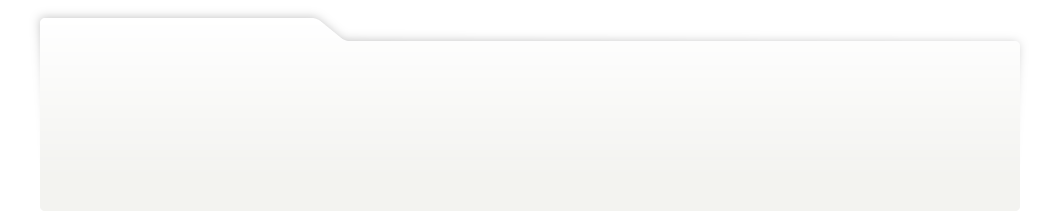
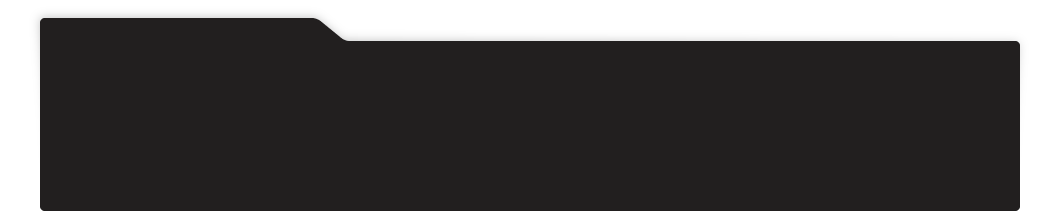
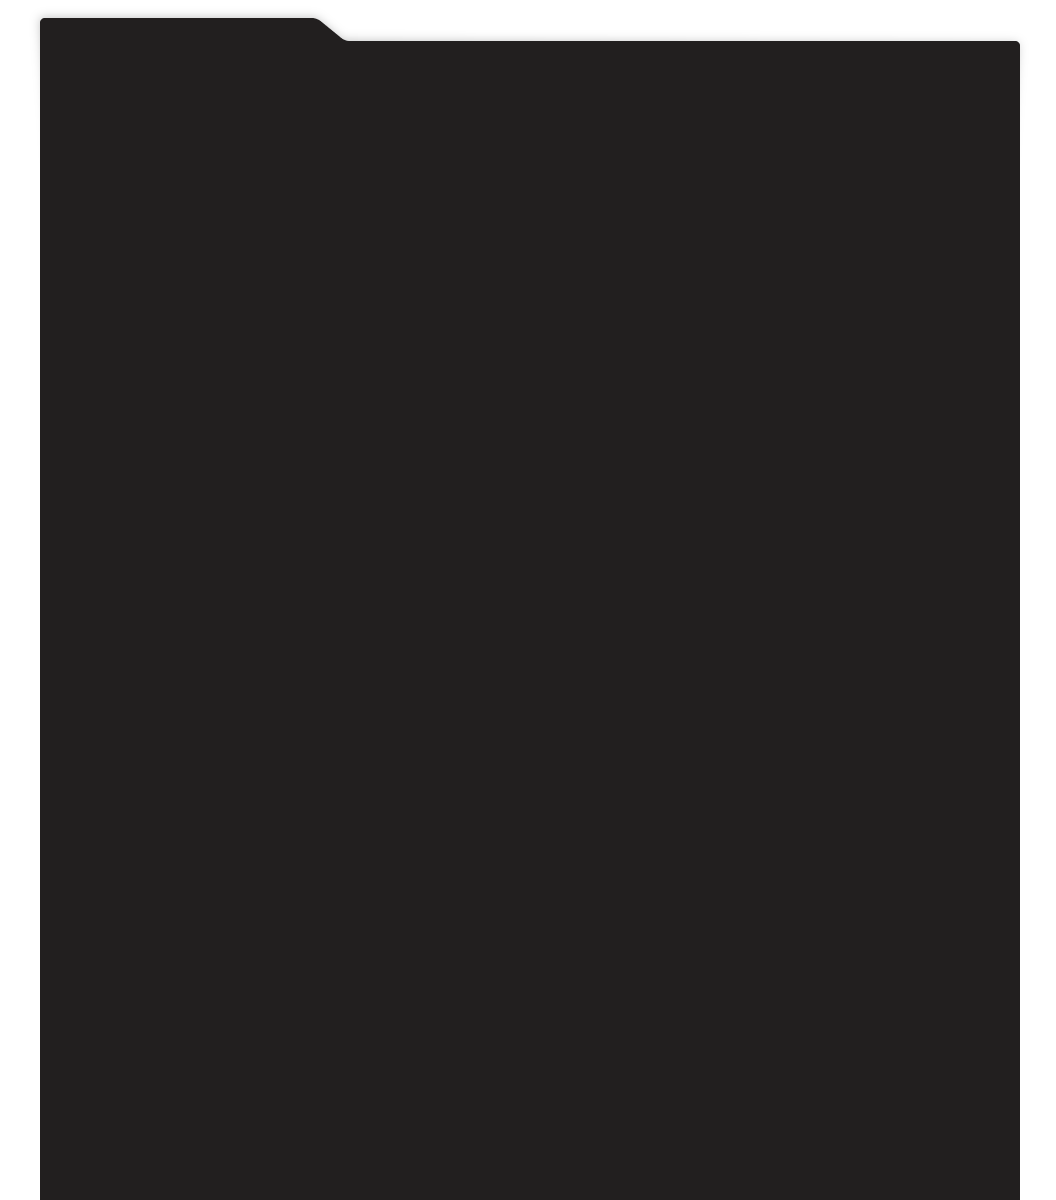
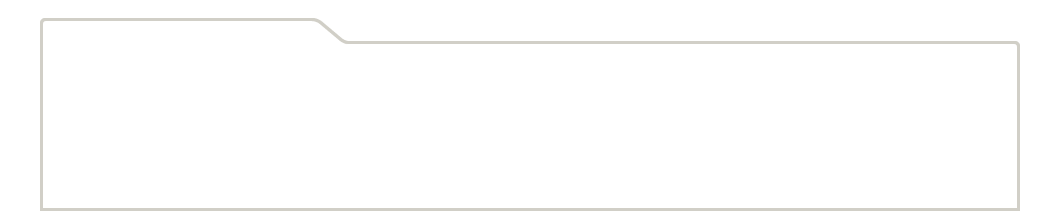
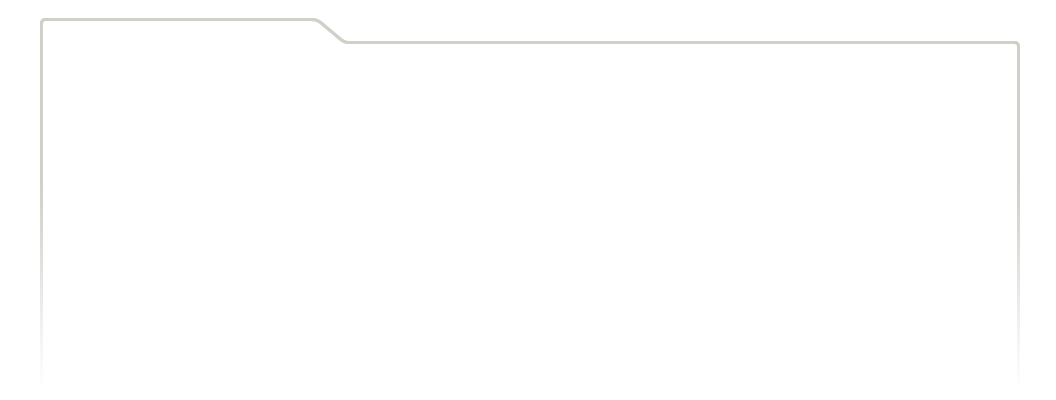
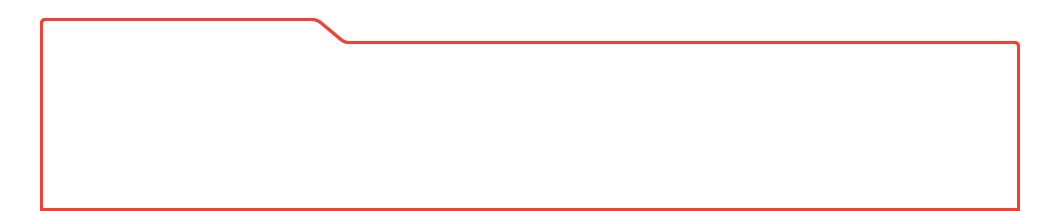
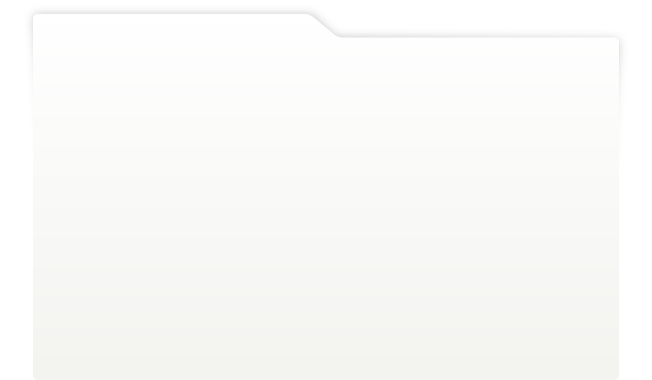
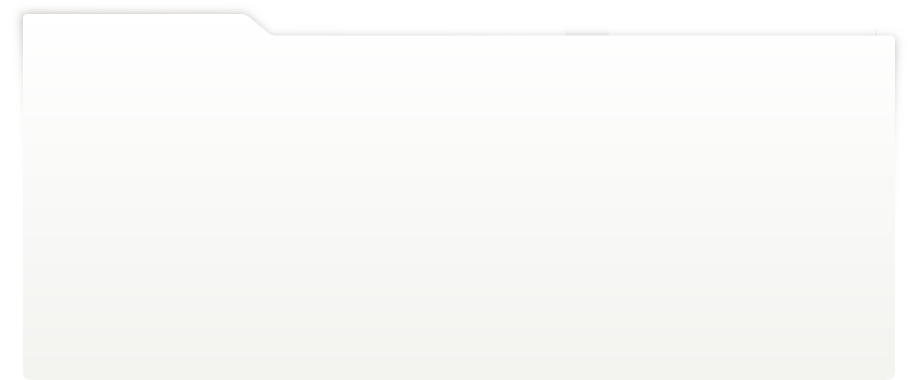
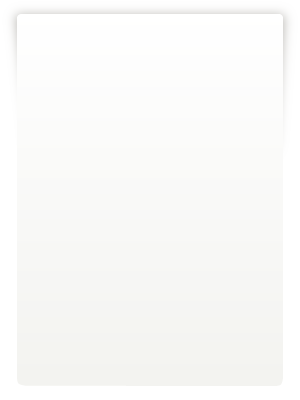
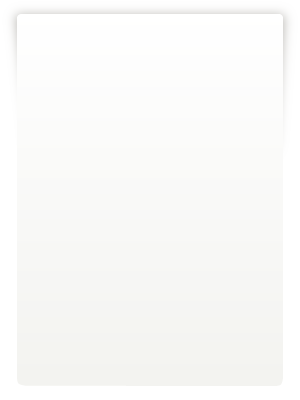
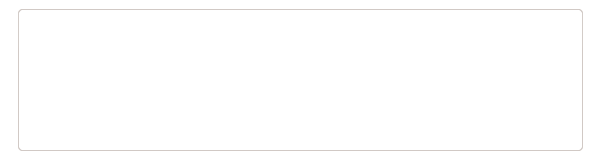
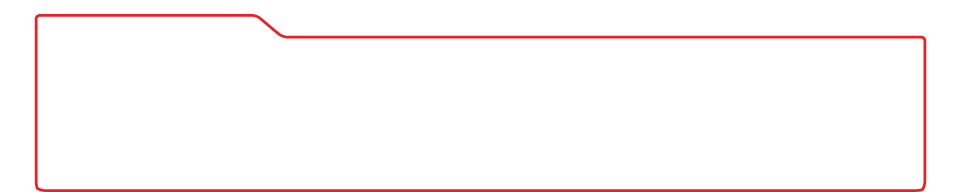
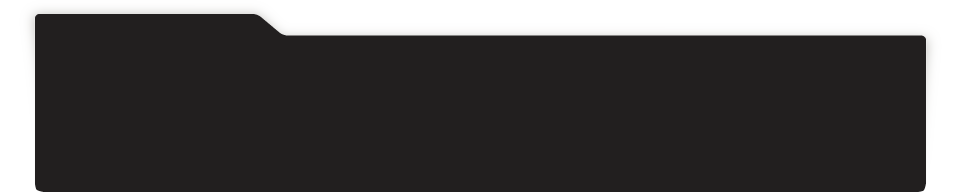
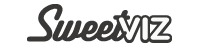
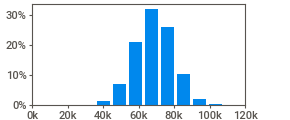
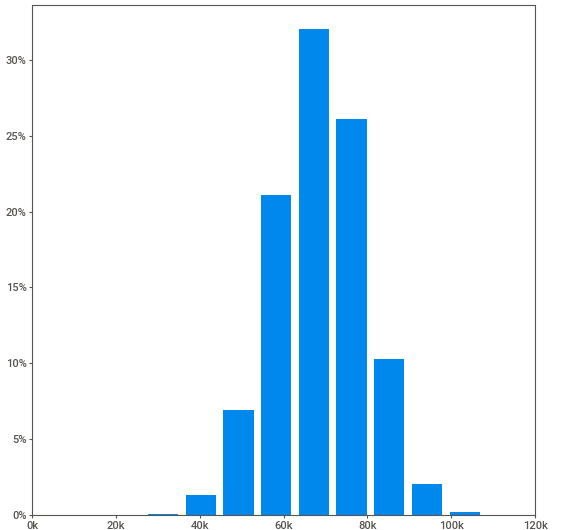
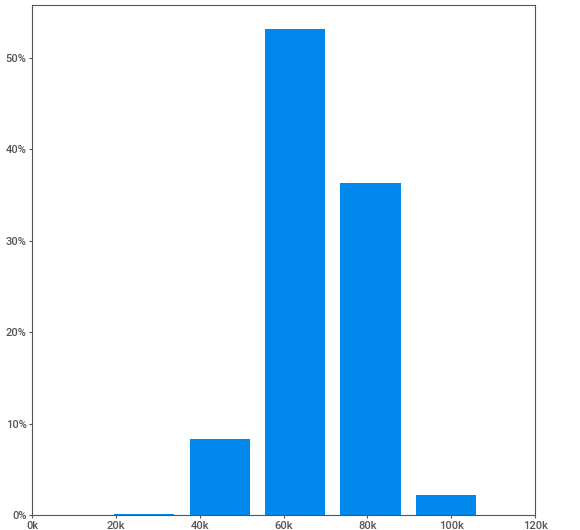
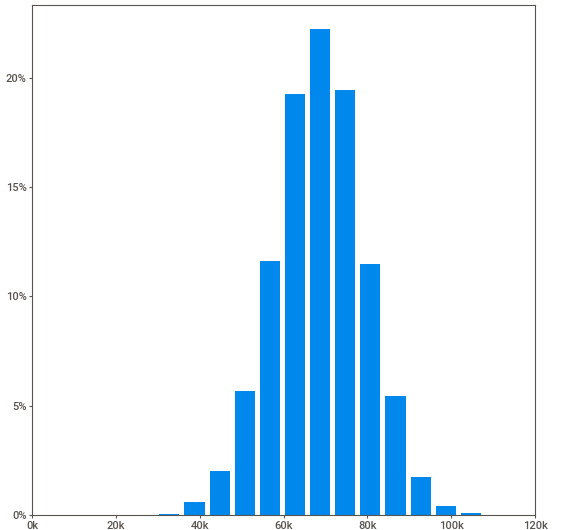
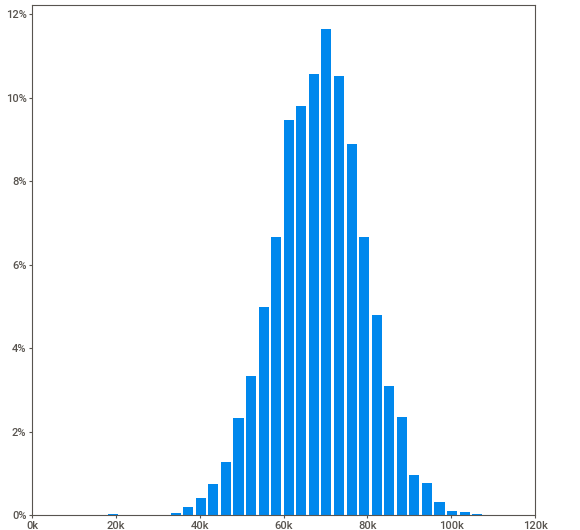
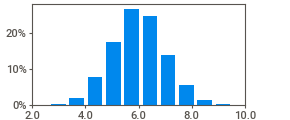
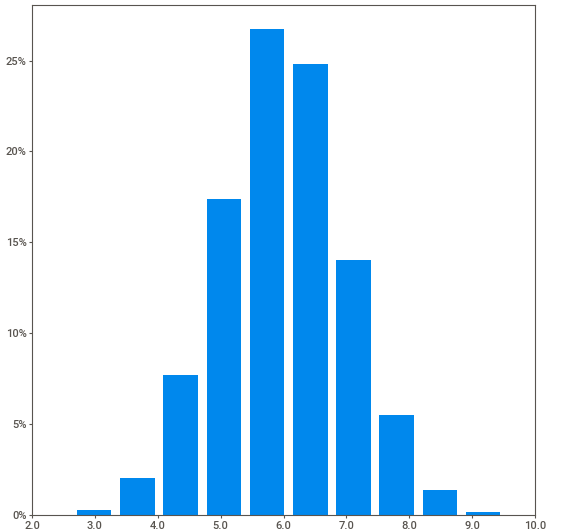
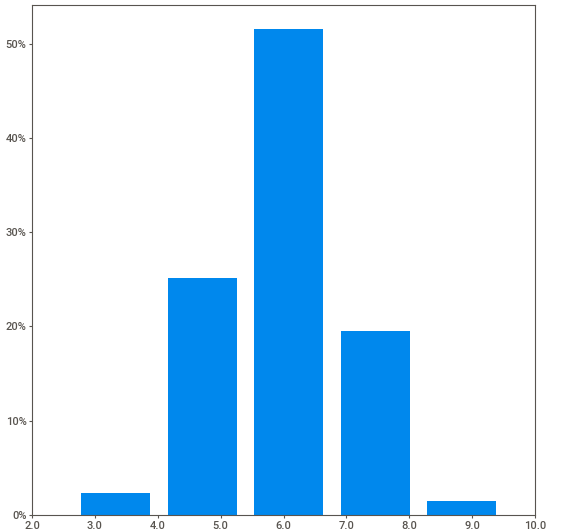
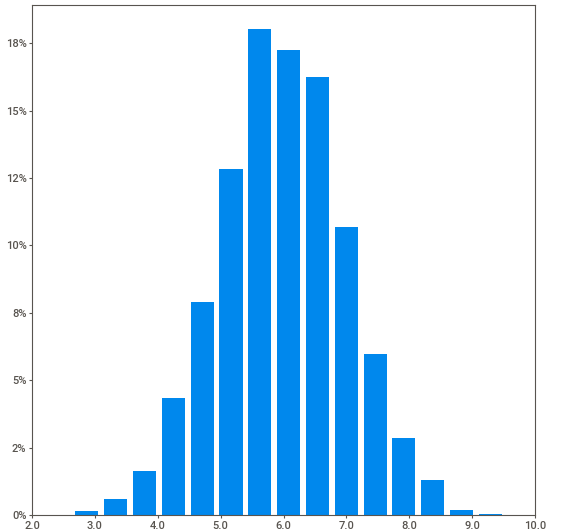
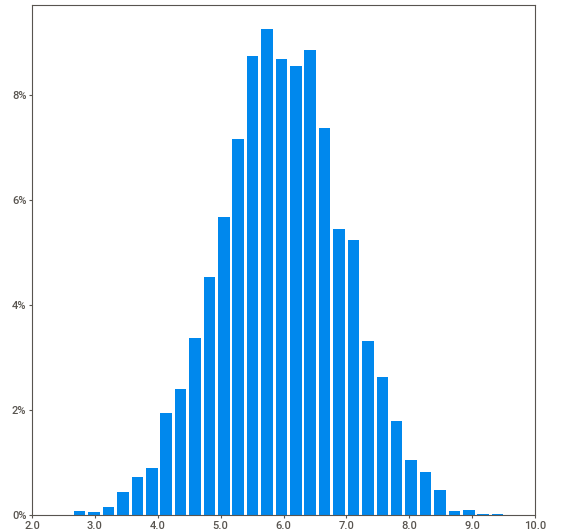
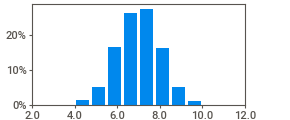
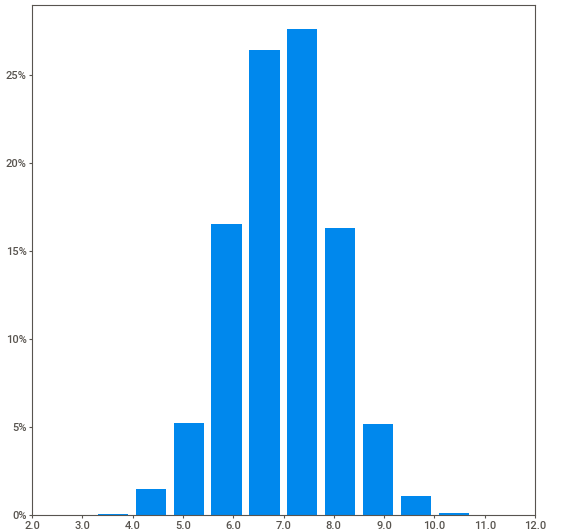
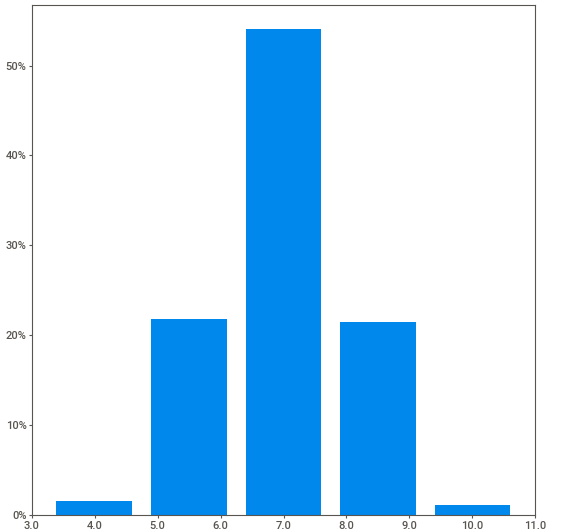
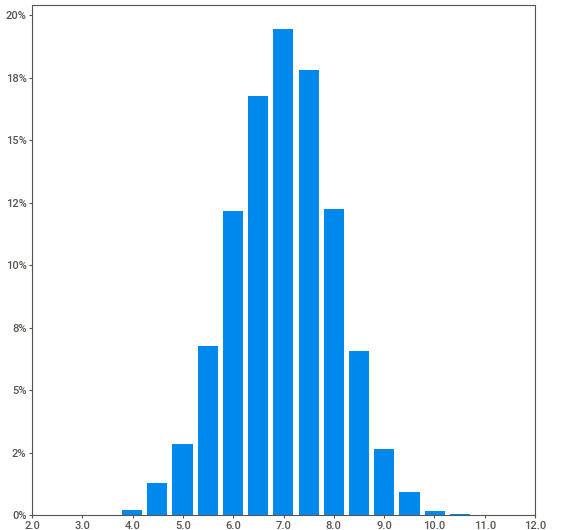
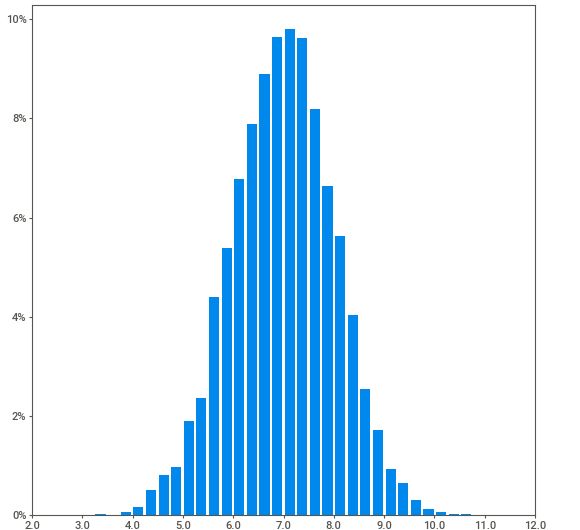
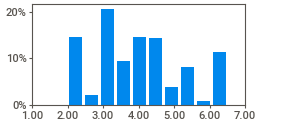
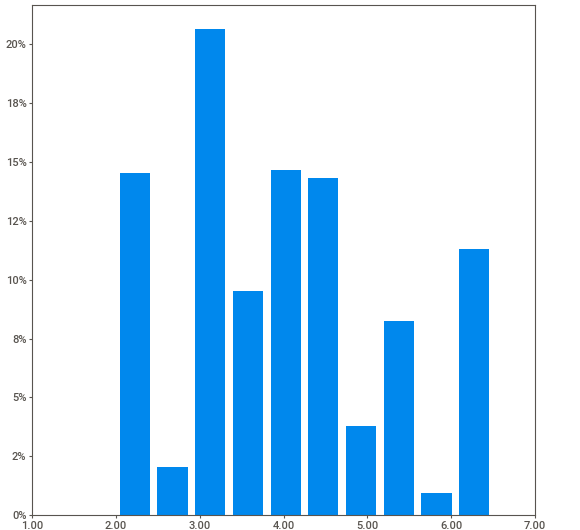
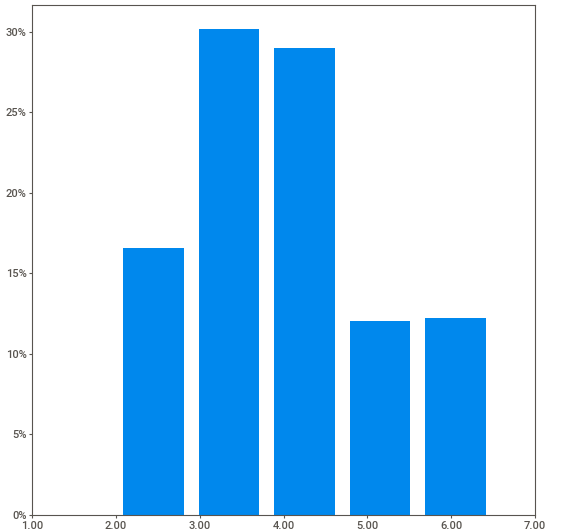
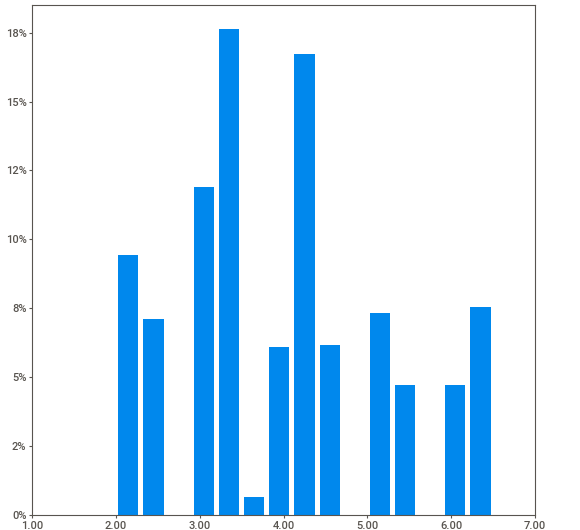
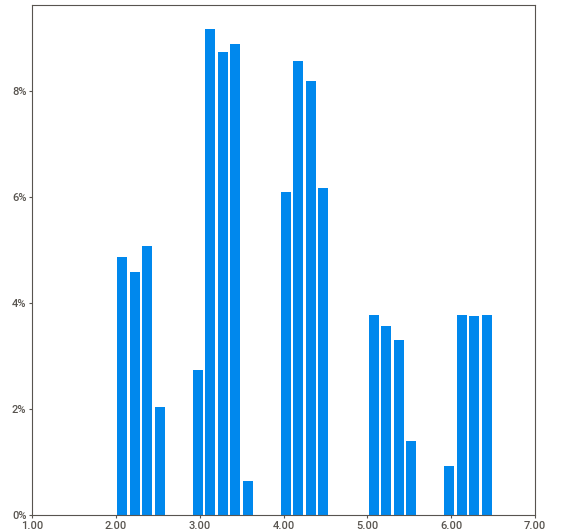
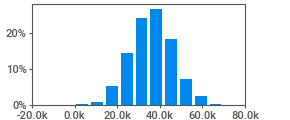
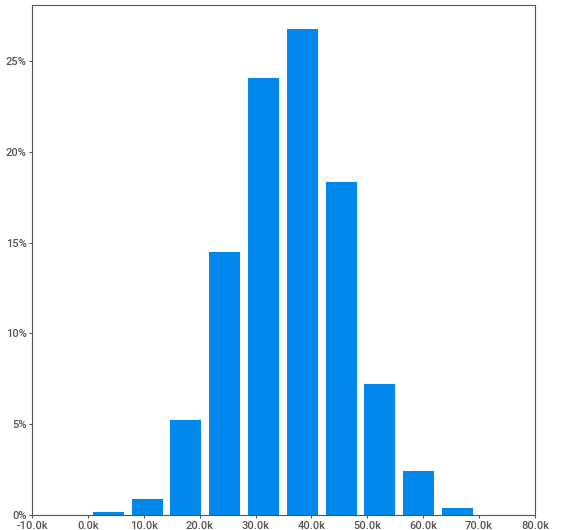
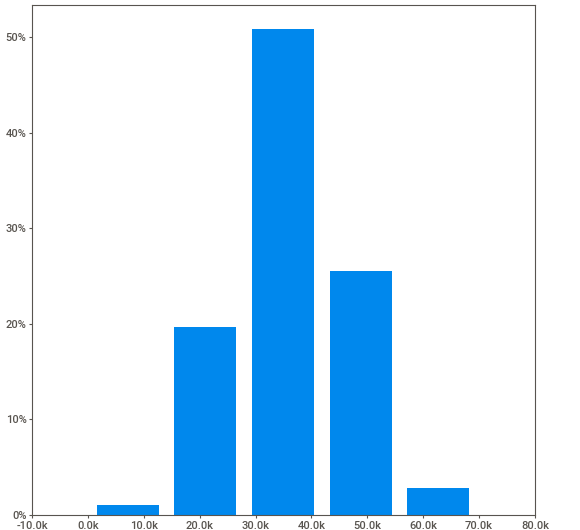
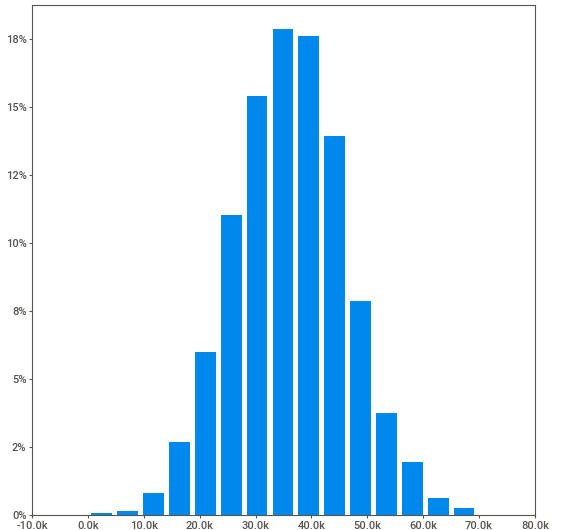
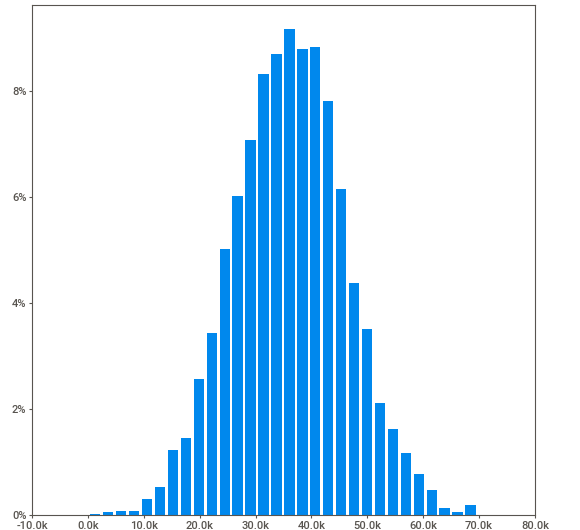
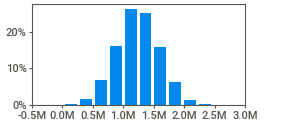
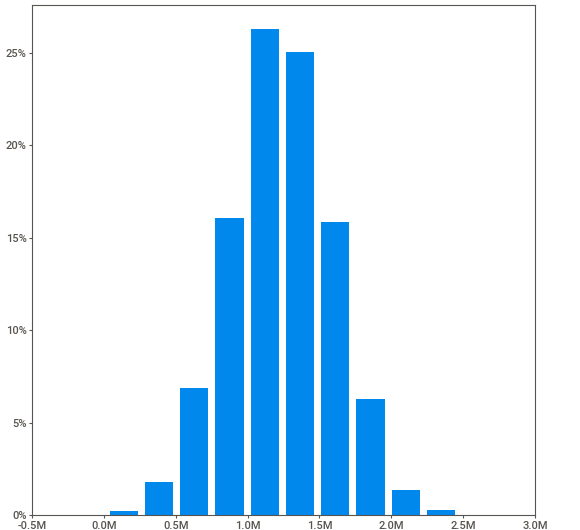
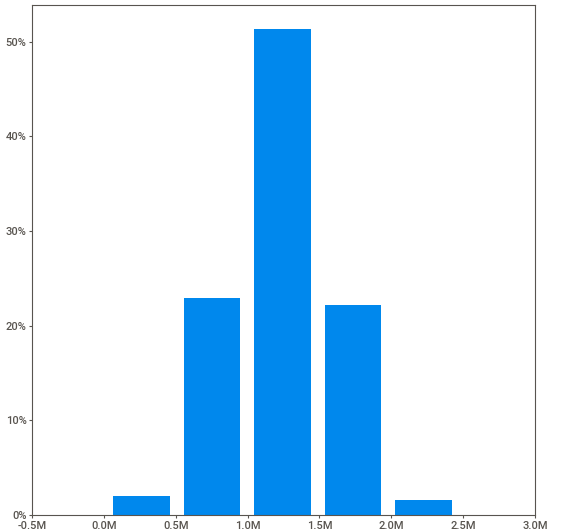
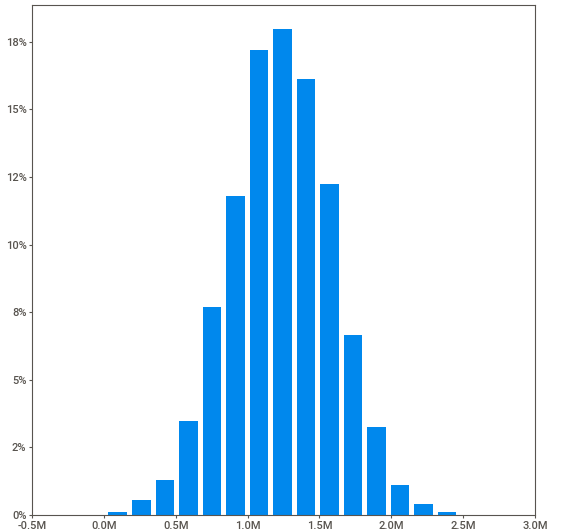
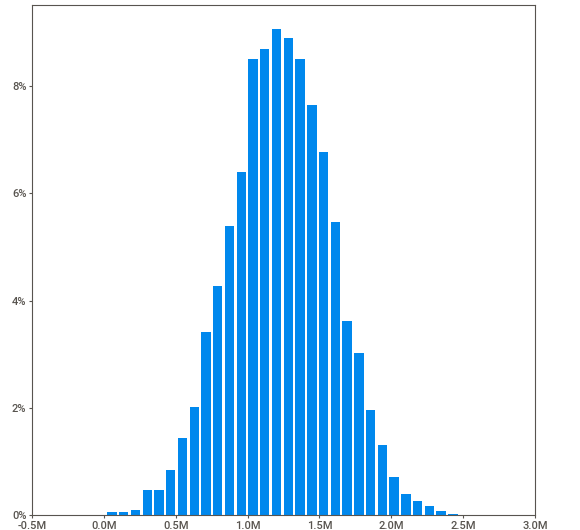
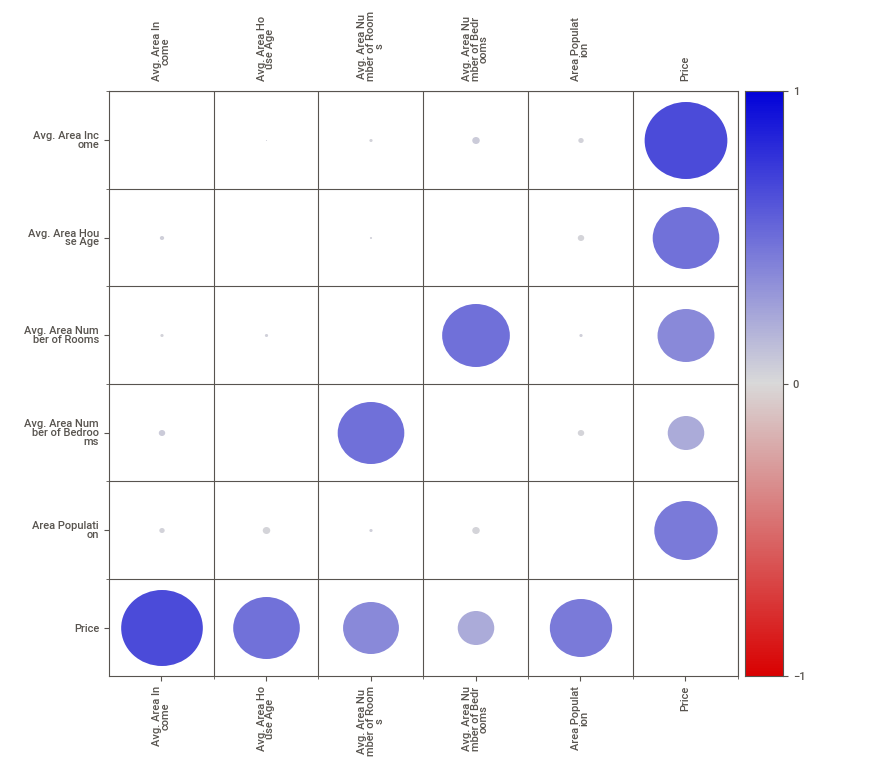
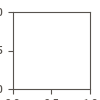

In [787]:
my_report = sv.analyze(USA_HOUSING)
my_report.show_notebook()

In [788]:
#pair plot all variables in our dataframe, except Address

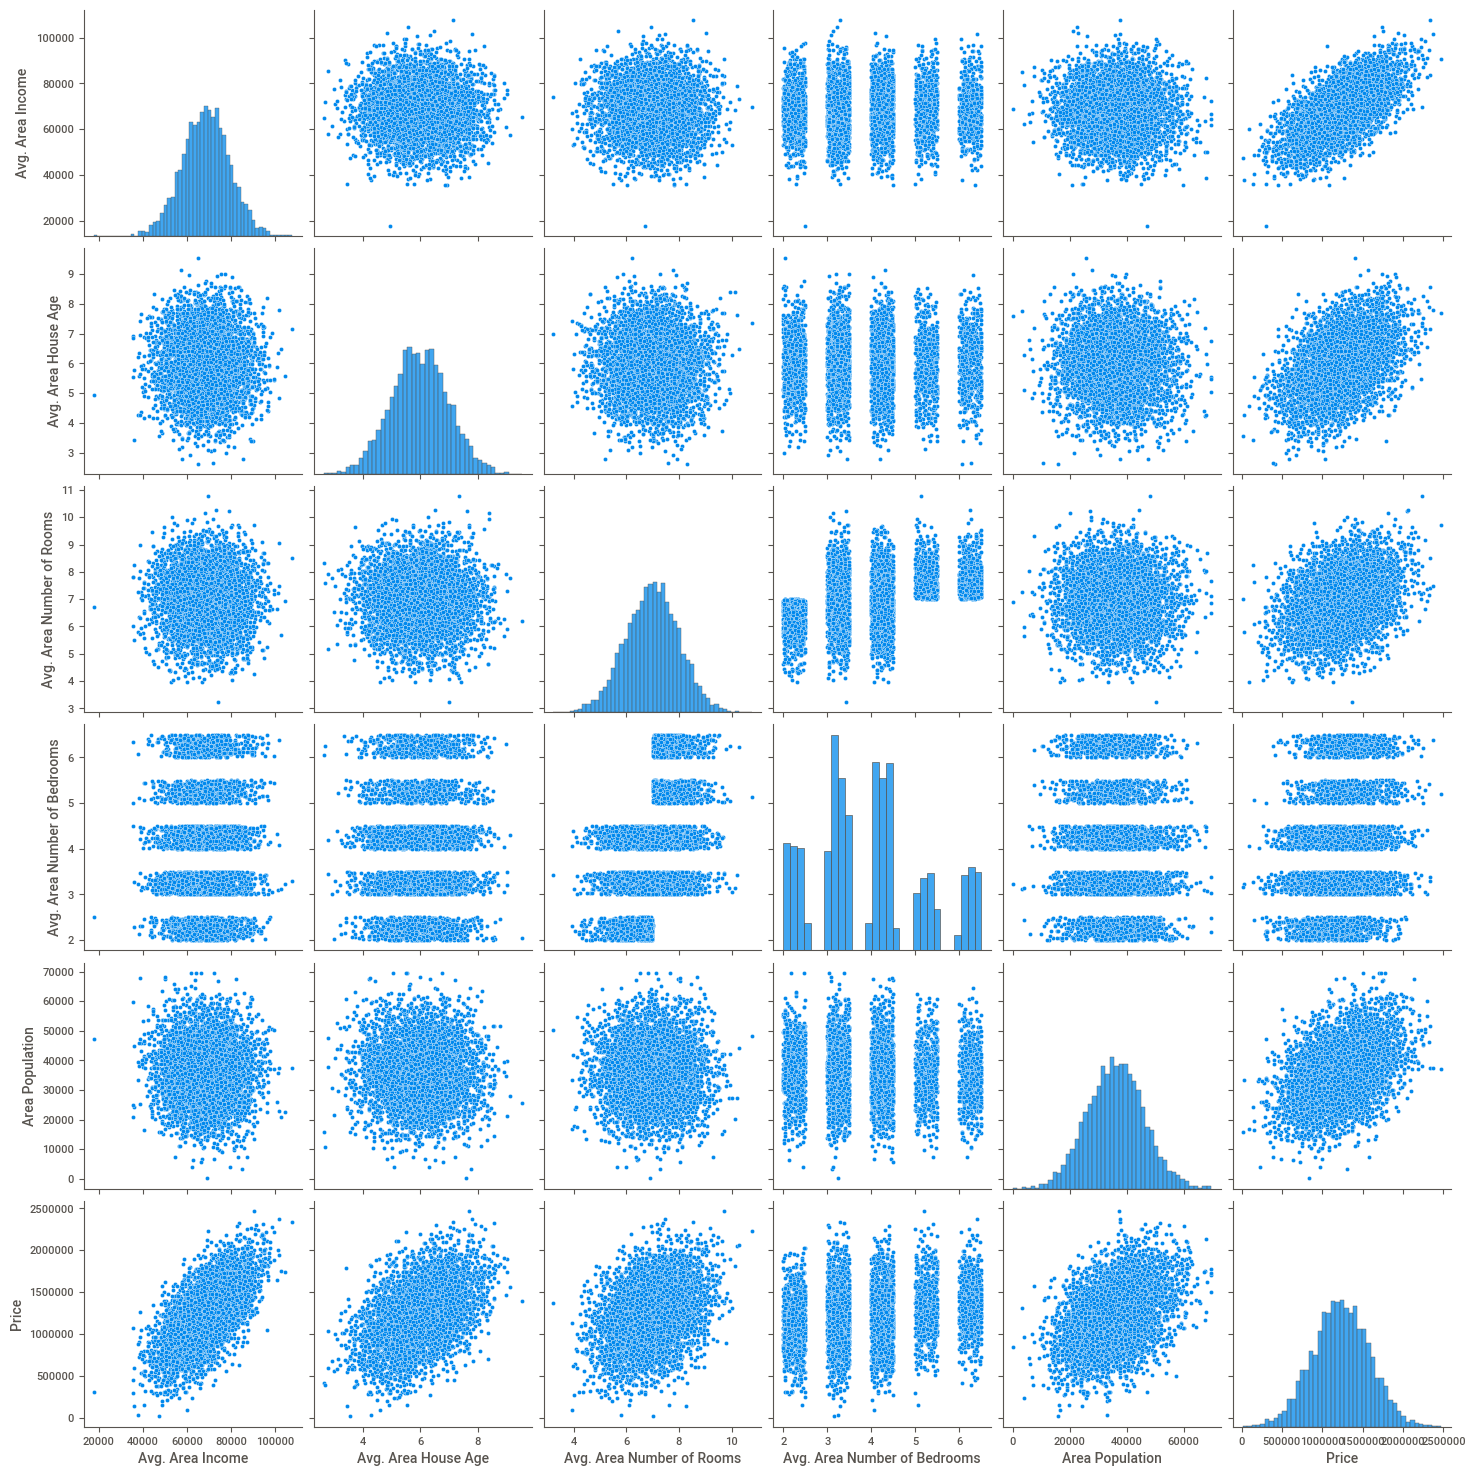

In [789]:
sns.pairplot(USA_HOUSING)
plt.show()

In [790]:
#Compare price to other values.

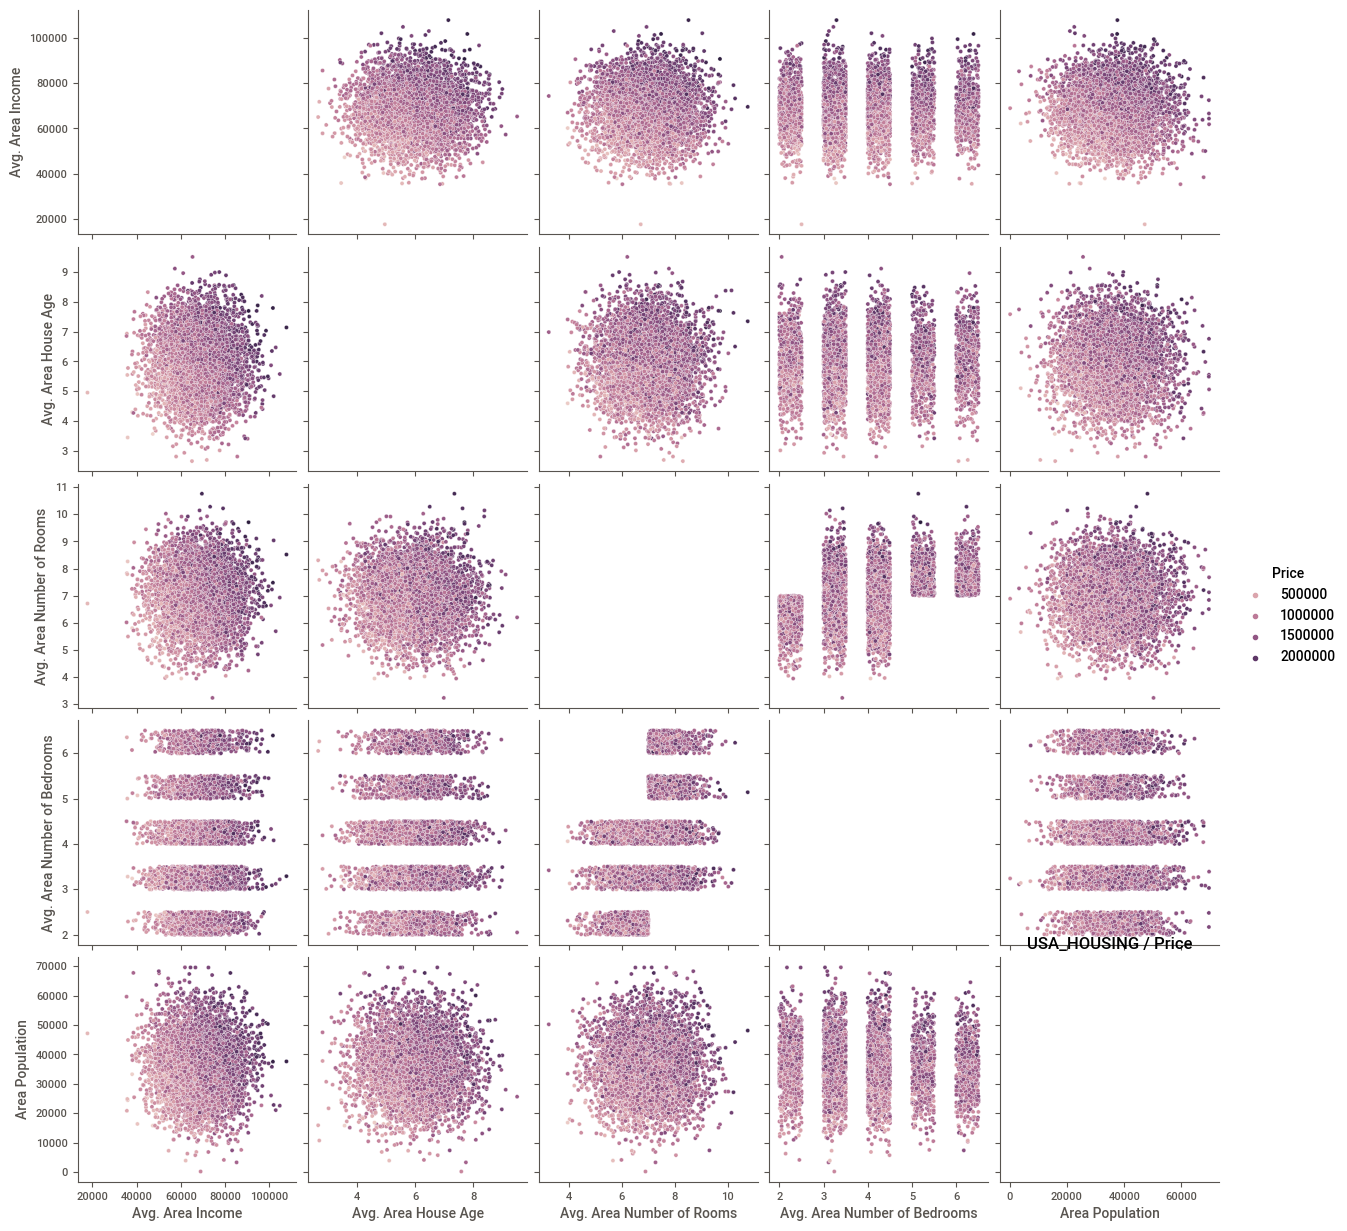

In [791]:
sns.pairplot(USA_HOUSING, hue="Price")
plt.title('USA_HOUSING / Price')
plt.show()

<Axes: >

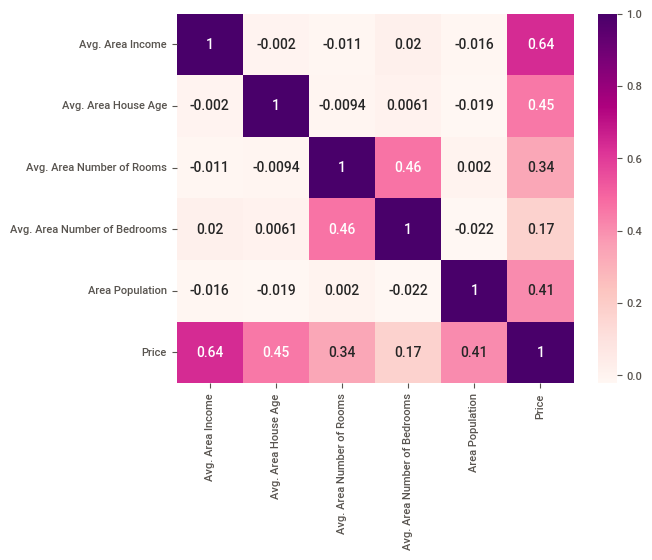

In [792]:
sns.heatmap(USA_HOUSING.corr(), annot=True,cmap='RdPu')

In [793]:
#Show Correlation between Price, Avg.Area Income and Avg. Area House Age

In [794]:
import plotly.graph_objects as go

labels = ['Price','Avg.Area Income','Avg. Area House Age']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [795]:
#Show Correlation between 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'

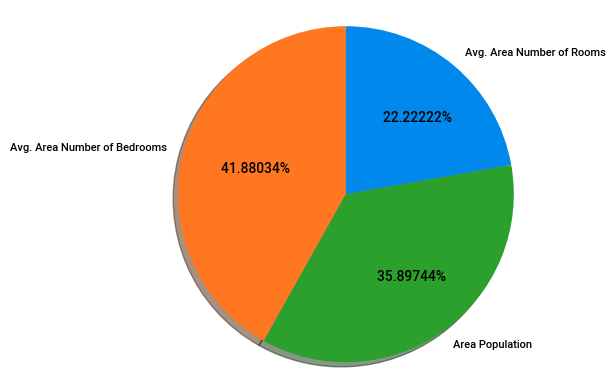

In [796]:
labels = ['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']
sizes = [130, 245, 210]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%12.5f%%', shadow=True, startangle=10)
plt.axis('equal')
plt.show()

In [797]:
y = USA_HOUSING['Price']
feature_cols = ['Avg. Area Income', 'Area Population']
x = USA_HOUSING[feature_cols]

In [798]:
x

Avg. Area Income  Area Population
0          79545.45857      23086.80050
1          79248.64245      40173.07217
2          61287.06718      36882.15940
3          63345.24005      34310.24283
4          59982.19723      26354.10947
...                ...              ...
4995       60567.94414      22837.36103
4996       78491.27543      25616.11549
4997       63390.68689      33266.14549
4998       68001.33124      42625.62016
4999       65510.58180      46501.28380

[5000 rows x 2 columns]

In [799]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [800]:
#import libaries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [801]:
#LogisticRegression

In [802]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.79545, random_state=1
)

In [803]:
x_train

Avg. Area Income  Area Population
2060       61369.48315      37670.82898
4020       76856.30386      29382.08979
4270       48418.25234      41513.39942
2452       77521.05738      32624.64650
3246       72314.50031      38251.86262
...                ...              ...
2895       56734.35076      27982.27171
2763       50212.43953      20913.65544
905        80011.58352      26576.39199
3980       72899.65820      39311.14754
235        67056.84048      25134.68148

[1022 rows x 2 columns]

In [804]:
lenreg = LogisticRegression()

In [805]:
# Fit Model/print the hyperparameters of the model
    #lenreg.fit(x_train,y_train)

In [806]:
# Record ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects
#discrete classes on a regression target with continuous values.

In [807]:
#LogisticRegression /FAILD 
#Ensure that you are using the right type of model for your problem 
#(regression vs. classification) and that your target variable (y) contains continuous values 
#if you are working on a regression task. If the issue persists, 
#providing more context or code snippets could help in providing a more specific solution.
#Also adjusted test zize

In [808]:
# 2nd Test using Multiple LinearRegression

In [809]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [810]:
x=USA_HOUSING.iloc[:,:4]
y=USA_HOUSING.iloc[:,4]

In [811]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
x=ohe.fit_transform(USA_HOUSING[['Price']])

In [812]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [813]:
#The array above, reflects the below six categories.

In [814]:
ohe.categories_

[array([  15938.65792,   31140.51762,   88591.77016, ..., 2332110.74   ,
        2370231.32   , 2469065.594  ])]

In [815]:
#from sklearn.compose import make_column_transformer
#col_trans=make_column_transformer(
    #(OneHotEncoder(handle_unknown='USA_HOUSING'),['Price']),
    #remainder='passthrough')
#x=col_trans.fit_transform(x)

In [816]:
#need to be re=arrange (same above)

#from sklearn.compose import make_column_transformer
#col_trans=make_column_transformer(
    #(OneHotEncoder(handle_unknown='ignore'),['State']),
    #remainder='passthrough')
#x=col_trans.fit_transform(x)

In [817]:
x #we need to see full number of data set, reason to make_column_transformer for OneHotEncoder

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [818]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [819]:
#View the shapes of splitter data.

#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)
X_train: (40, 6)
X_test: (10, 6)
Y_train: (40,)
Y_test: (10,)

X_train: (4000, 5000)
X_test: (1000, 5000)
Y_train: (4000,)
Y_test: (1000,)


In [820]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [821]:
y_pred=linreg.predict(x_test)
y_pred

array([36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
       36356.57016987, 36356.57016987, 36356.57016987, 36356.57016987,
      

In [822]:
# I have different metrics to find the accuracy
#score of the model, here I use r2_score to evaluate our model and find its accuracy.

In [849]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.80


In [850]:
#If the R-squared value is 0.9180,  model explains approximately 91.80% of the 
#variance in the target variable, which indicates a good fit. 
#Higher R-squared values closer to 1 indicate a better fit of the model to the data.

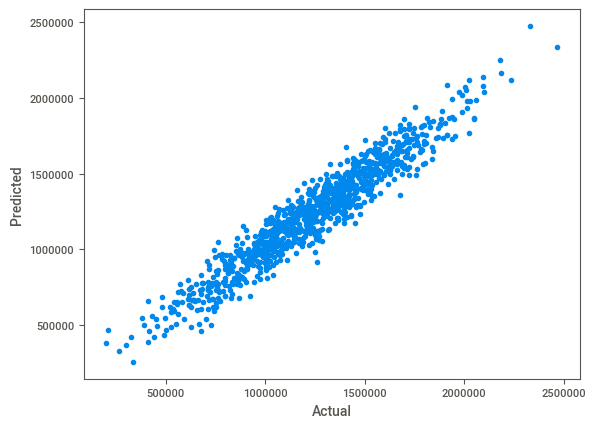

In [851]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [826]:
#A regression plot to understand the linear relationship between two parameters.

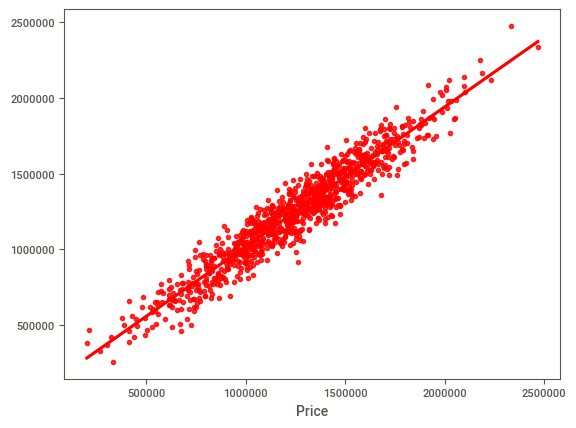

In [852]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [828]:
#create a new data frame that contains actual values, predicted values, and differences
#between them so that we will understand how near the model predicts its actual value.

In [829]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [830]:
#View the data frame.

pred_df

Actual Value  Predicted Value   Difference
398    42789.69222      36356.57017   6433.12205
3833   40217.33358      36356.57017   3860.76341
4836   25696.36174      36356.57017 -10660.20843
4572   27445.87674      36356.57017  -8910.69343
636    30852.20701      36356.57017  -5504.36316
...            ...              ...          ...
4228   19745.49279      36356.57017 -16611.07738
2367   40865.81789      36356.57017   4509.24772
788    18656.64243      36356.57017 -17699.92774
1452   33434.11259      36356.57017  -2922.45758
3265   19376.31893      36356.57017 -16980.25124

[1000 rows x 3 columns]

In [831]:
#NOTE: Here we can see the difference between Actual values and predicted 
#values ABOVE, which are Low. When values are in the range of lakhs means'One hundred thousand'. then the difference in thousands is not much.
#We have already seen that the accuracy of the model is -0.82


In [832]:
#failed reading, score is negative

In [833]:
#3rd Test Lasso Regression:

In [834]:
#Dividing the dataset into train and test sets:
X = USA_HOUSING.drop(columns = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'])
Y = USA_HOUSING['Price']
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [835]:
#Three. comparing Linear, Ridge, and Lasso Regression (reflect any change)

In [836]:
from sklearn.metrics import mean_squared_error, r2_score

In [837]:
#LinearRegression view below

In [838]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, lin_reg_y_pred)
print(mse)

3.570582685855778e-20


In [839]:
# Lasso Regression view below 

In [840]:
#Fitting the model on Lasso Regression:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)

7.878233778137495e-12


In [841]:
#Fitting the model on Ridge Regression:

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(mse)

4.980621492491067e-19


C:\Users\Renee Garrett\AppData\Local\Temp\ipykernel_896\1381743308.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Linear'), Text(1, 0, 'Lasso'), Text(2, 0, 'Ridge')]

<Figure size 5500x600 with 0 Axes>

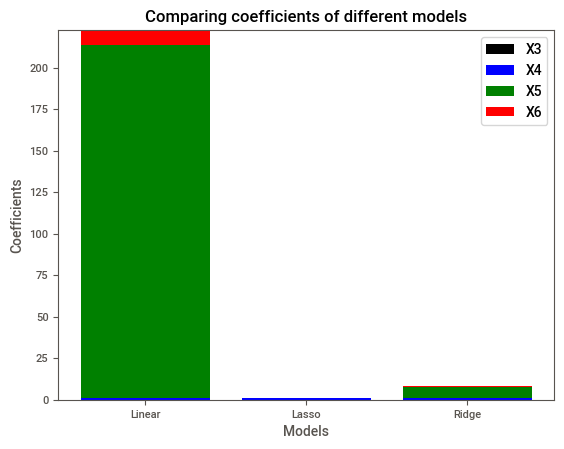

In [842]:
plt.figure(figsize=(55,6))
x = ['Linear', 'Lasso', 'Ridge']
y1 = np.array([-0.004709, -0.005994, 0.005700])
y2 = np.array([1.007691, 0.958896,  1.135925])
y3 = np.array([221.632669, 0.000000, 7.304642])
y4 = np.array([-8.841321, -0.000000, -0.915969])
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.bar(x, y4, bottom=y1+y2+y3, color='r')
plt.xlabel("Models")
plt.ylabel("Coefficients")
plt.legend(["X3", "X4", "X5", "X6"])
plt.title("Comparing coefficients of different models")
axes.set_xticklabels(['Linear', 'Lasso', 'Ridge'])


In [843]:
# NOTE: Inspecting the coefficients, we notice Lasso and Ridge Regression had shrunk the coefficients,
# and thus the coefficients are close to zero. On the contrary, 
# Linear Regression still has a substantial value of the coefficient for the X5 column.\

In [844]:
#lasso test

In [845]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [846]:

X = USA_HOUSING[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USA_HOUSING['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print("\nCoefficients:")
print(coefficients)

Mean Squared Error: 10089007630.836329

Coefficients:
Avg. Area Income                231741.788423
Avg. Area House Age             163580.685299
Avg. Area Number of Rooms       120724.849698
Avg. Area Number of Bedrooms      2992.313202
Area Population                 152235.794614
dtype: float64


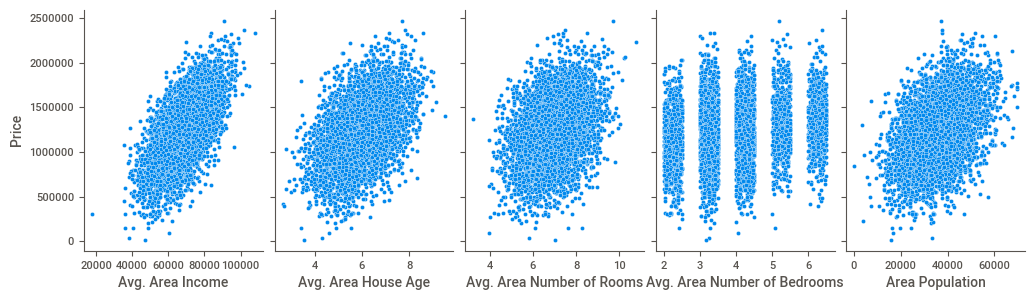

In [847]:
X = USA_HOUSING[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USA_HOUSING['Price']

# Create a pair plot to visualize relationships between features and the target variable
sns.pairplot(USA_HOUSING, x_vars=X.columns, y_vars='Price', kind='scatter', height=3, aspect=0.7)
plt.show()

In [848]:
#Conculed: Price" is a candidate for the target variable